# Classificação de imagens do dataset IRIS com CNN


## A Operação de Convolução
![title](img/convolution.gif)


## Redes Neurais Convolucionais (Convolutional Neural Networks - CNN)

![title](img/cnn.png)

# Imports

In [1]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np

import keras

from keras.models import Sequential
from keras.layers import Dense, Activation

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from keras.layers import Dense, Conv1D, Dropout, Flatten, MaxPooling1D

import matplotlib.pyplot as plt
%matplotlib inline 


Using TensorFlow backend.


# Carregando o Dataset

In [2]:
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
iris['target_names'] # tipos de iris


array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
iris['feature_names'] # características de iris

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
print(iris['data'].shape)
iris['data'][:10] #contêm as medidas de cada flor

(150, 4)


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [6]:
X, y = iris.data[:, :4], iris.target

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.5)

print('Shape de x_train', x_train.shape)
print('Shape de x_val', x_val.shape)
print('Shape de x_test', x_test.shape)

print('Shape de y_train', y_train.shape)
print('Shape de y_val', y_val.shape)
print('Shape de y_test', y_test.shape)

Shape de x_train (60, 4)
Shape de x_val (60, 4)
Shape de x_test (30, 4)
Shape de y_train (60,)
Shape de y_val (60,)
Shape de y_test (30,)


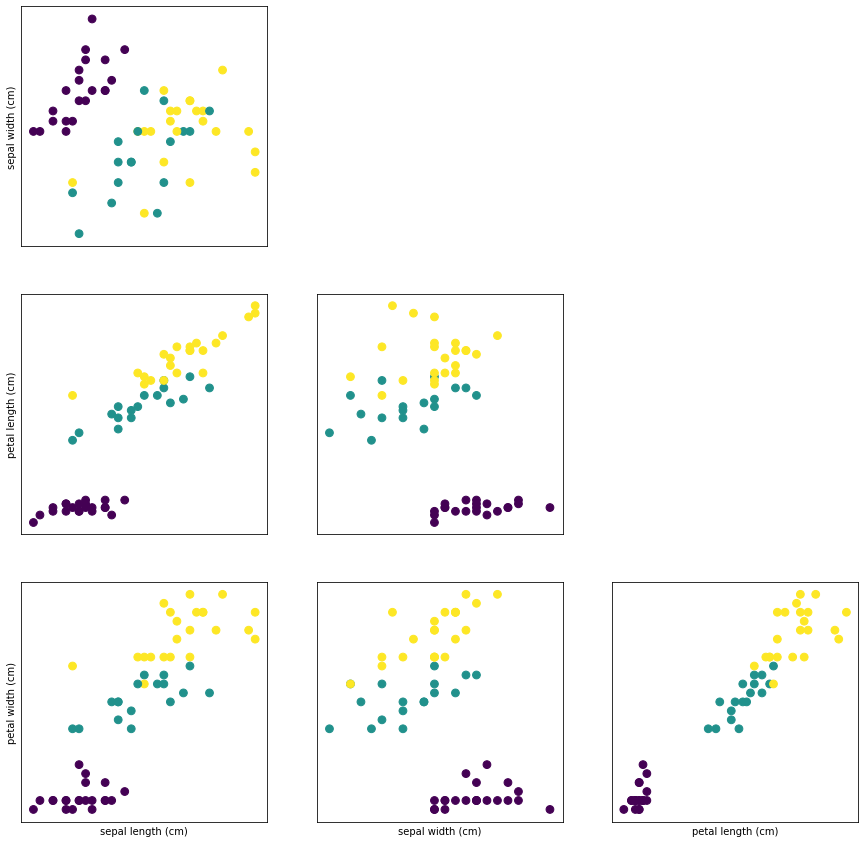

In [7]:
fig, ax = plt.subplots(3, 3, figsize=(15,15))

for i in range(3):
    for j in range(3):
        ax[i,j].scatter(x_train[:,j], x_train[:, i + 1], c=y_train, s=60)
        ax[i,j].set_xticks(())
        ax[i,j].set_yticks(())
        
        if i == 2:
            ax[i,j].set_xlabel(iris['feature_names'][j])
        if j == 0:
            ax[i,j].set_ylabel(iris['feature_names'][i + 1])
        if j > i:
            ax[i,j].set_visible(False)

# Conversão

#### Conversão para One Hot Enconding

In [8]:
onehot_encoder_y_train = OneHotEncoder(sparse=False)
integer_encoded_y_train = y_train.reshape(len(y_train), 1)
y_train = onehot_encoder_y_train.fit_transform(integer_encoded_y_train)

onehot_encodery_test = OneHotEncoder(sparse=False)
integer_encoded_y_test = y_test.reshape(len(y_test), 1)
y_test = onehot_encodery_test.fit_transform(integer_encoded_y_test)

onehot_encodery_val = OneHotEncoder(sparse=False)
integer_encoded_y_val = y_val.reshape(len(y_val), 1)
y_val = onehot_encodery_val.fit_transform(integer_encoded_y_val)


#### Conversão para o formato do CNN1D

In [9]:
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))
x_val = np.reshape(x_val, (x_val.shape[0], 1, x_val.shape[1]))

In [10]:
print(x_train.shape)
print(y_train.shape)

(60, 1, 4)
(60, 3)


In [11]:
print(x_test.shape)
print(y_test.shape)

(30, 1, 4)
(30, 3)


In [12]:
print(x_val.shape)
print(y_val.shape)

(60, 1, 4)
(60, 3)


# Model da Rede CNN1D

In [21]:
n_timesteps, n_features, n_outputs = x_train.shape[1], x_train.shape[2], y_train.shape[1]
#print(n_timesteps, n_features)

keras.backend.clear_session()

input_shape = (n_timesteps,n_features)

# Criando um modelo Sequential e adicionando as camadas
model = Sequential()
model.add(Conv1D(60, kernel_size=1, input_shape=input_shape))
model.add(MaxPooling1D(pool_size=1))
model.add(Flatten()) # Tornando os arrays 2D para flatten (achatado, 1D) para utilização de camadas totalmente conectadas
model.add(Dense(9, activation='relu'))
model.add(Dropout(0.2)) # utiliza o dropout para melhorar o processo de treinamento e evitar under/overfitting
model.add(Dense(n_outputs,activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 1, 60)             300       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 60)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 60)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 9)                 549       
_________________________________________________________________
dropout_1 (Dropout)          (None, 9)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 30        
Total params: 879
Trainable params: 879
Non-trainable params: 0
________________________________________________________

In [ ]:
batch_size = 16
epochs = 200

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) #sparse

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_val, y_val))

In [ ]:
# Plotando o historico do processo de treinamento
plt.figure(figsize=(20, 5))
plt.plot(history.history['loss'], color='blue')
plt.plot(history.history['val_loss'], color='red')
plt.title('Model loss', fontsize=20)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Treinamento', 'Validação'], loc='upper right', fontsize=14)
plt.show()

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Predição

In [ ]:
#testing model
x_new = np.array([[[5, 2.9, 1, 0.2]]])
x_new.shape

In [ ]:
prediction = model.predict(x_new)
prediction

In [ ]:
iris['target_names'][prediction.argmax()]